<a href="https://colab.research.google.com/github/Nicovirdiano/redneural-prediccion/blob/main/Pytorch_red_neural1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.__version__

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, TensorDataset
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
 



In [ ]:

datos=pd.read_csv ("/content/drive/MyDrive/base de datos/archive.zip")
datos.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
#separamos la ultima columna exited
datos_y = datos[datos.columns[-1]]
datos_y.head

<bound method NDFrame.head of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

In [ ]:
#eliminamos las columnas con datos que no son utiles
datos_x = datos.drop(columns=["RowNumber","CustomerId","Surname","Exited"])
datos_x.head

<bound method NDFrame.head of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  

In [ ]:
# realizamos transformacion de datos en texto a datos numericos. 
datos_x = pd.get_dummies(datos_x)
datos_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [ ]:
# vamos a escalar los datos para que esten en un rango de menor valor

escalador = StandardScaler()
datos_x = escalador.fit_transform(datos_x)
print (datos_x)

[[-0.32622142  0.29351742 -1.04175968 ... -0.57380915  1.09598752
  -1.09598752]
 [-0.44003595  0.19816383 -1.38753759 ...  1.74273971  1.09598752
  -1.09598752]
 [-1.53679418  0.29351742  1.03290776 ... -0.57380915  1.09598752
  -1.09598752]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ... -0.57380915  1.09598752
  -1.09598752]
 [ 1.25683526  0.29351742 -0.69598177 ... -0.57380915 -0.91241915
   0.91241915]
 [ 1.46377078 -1.04143285 -0.35020386 ... -0.57380915  1.09598752
  -1.09598752]]


In [ ]:
#dividir datos entre test y entrenamiento
#1° imprimir el numero de registros


datos_x.shape[0]



10000

In [ ]:
from numpy.core.fromnumeric import size
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size = 0.2, random_state = 2)


In [ ]:
print("x_trian: {}, x test:{}, y_train:{}, y_test:{}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

x_trian: (8000, 13), x test:(2000, 13), y_train:(8000,), y_test:(2000,)


In [ ]:
n_entradas = x_train.shape[1]

In [ ]:
# pasar los datos al formato tensor anteriormente estuvimos usando pandas

t_x_train = torch.from_numpy(x_train).float().to("cpu")
t_x_test = torch.from_numpy(x_test).float().to("cpu")
t_y_train = torch.from_numpy(y_train.values).float().to("cpu")
t_y_test = torch.from_numpy(y_test.values).float().to("cpu")
t_y_train = t_y_train[:,None]
t_y_test = t_y_test[:,None]

In [ ]:
test = TensorDataset(t_x_test, t_y_test)
print(test[0])

(tensor([ 0.8326, -0.0879,  1.7245,  0.7569,  0.8077,  0.6461, -1.0307,  1.2390,
         0.9972, -0.5787, -0.5738,  1.0960, -1.0960]), tensor([1.]))


In [ ]:
t_y_train

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

In [ ]:
class Red(nn.Module):
    
    def __init__(self, n_entradas):
        super(Red, self).__init__()
        self.linear1 = nn.Linear(n_entradas, 15)
        self.linear2 = nn.Linear(15, 8)
        # self.linear3 = nn.Linear(8,160)
        # self.linear4 = nn.Linear(160, 200)
        # self.linear5 = nn.Linear(200, 1)
        self.linear3 = nn.Linear(8, 1)
    
    def forward(self, inputs):
        pred_1 = torch.sigmoid(input=self.linear1(inputs))
        pred_2 = torch.sigmoid(input=self.linear2(pred_1))
        # prediction = torch.sigmoid(input=self.linear3(prediction))
        # prediction = torch.sigmoid(input=self.linear4(prediction))
        #prediction = torch.sigmoid(input=self.linear5(prediction))
        pred_f = torch.sigmoid(input=self.linear3(pred_2))
        return pred_f

In [ ]:

%%time
lr = 0.001
epochs = 2000
estatus_print = 100

model = Red(n_entradas=n_entradas)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
print("Arquitectura del modelo: {}".format(model))
historico = pd.DataFrame()


Arquitectura del modelo: Red(
  (linear1): Linear(in_features=13, out_features=15, bias=True)
  (linear2): Linear(in_features=15, out_features=8, bias=True)
  (linear3): Linear(in_features=8, out_features=1, bias=True)
)
CPU times: user 2.99 ms, sys: 667 µs, total: 3.66 ms
Wall time: 3.12 ms


Entrenando el modelo neural

Epoch 100 	 Loss: 0.5244
Accuracy: 80.8499984741211

Epoch 200 	 Loss: 0.4932
Accuracy: 80.8499984741211

Epoch 300 	 Loss: 0.4845
Accuracy: 80.8499984741211

Epoch 400 	 Loss: 0.4786
Accuracy: 80.8499984741211

Epoch 500 	 Loss: 0.473
Accuracy: 80.8499984741211

Epoch 600 	 Loss: 0.4672
Accuracy: 80.8499984741211

Epoch 700 	 Loss: 0.4611
Accuracy: 80.8499984741211

Epoch 800 	 Loss: 0.4548
Accuracy: 80.8499984741211

Epoch 900 	 Loss: 0.4486
Accuracy: 80.8499984741211

Epoch 1000 	 Loss: 0.4426
Accuracy: 80.8499984741211

Epoch 1100 	 Loss: 0.4372
Accuracy: 80.8499984741211

Epoch 1200 	 Loss: 0.4324
Accuracy: 80.8499984741211

Epoch 1300 	 Loss: 0.4283
Accuracy: 81.0

Epoch 1400 	 Loss: 0.4248
Accuracy: 81.6500015258789

Epoch 1500 	 Loss: 0.4216
Accuracy: 81.69999694824219

Epoch 1600 	 Loss: 0.4186
Accuracy: 82.4000015258789

Epoch 1700 	 Loss: 0.4157
Accuracy: 82.69999694824219

Epoch 1800 	 Loss: 0.4129
Accuracy: 83.0

Epoch 1900 	 Loss: 0.41
Accurac

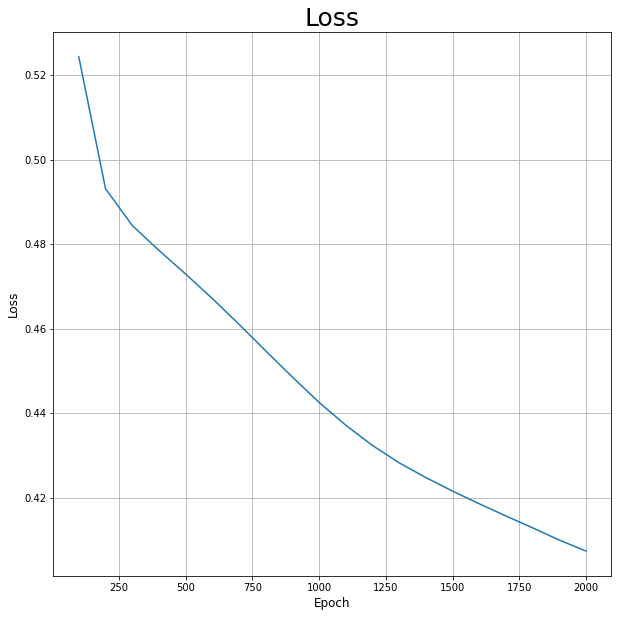

In [ ]:
print("Entrenando el modelo neural")
for epoch in range(1, epochs+1):
  y_pred = model(t_x_train)
  loss = loss_fn(input=y_pred, target=t_y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % estatus_print == 0:
        print(f"\nEpoch {epoch} \t Loss: {round(loss.item(), 4)}")

        with torch.no_grad():
           y_pred = model(t_x_test)
           y_pred_class = y_pred.round()
           correct = (y_pred_class == t_y_test).sum()
        accuracy = 100 * correct / float(len(t_y_test))
        if epoch % estatus_print == 0:
            print("Accuracy: {}".format(accuracy.item()))

            df_tmp = pd.DataFrame(data={
        'Epoch': epoch,
        'Loss': round(loss.item(), 4),
        'Accuracy': round(accuracy.item(), 4)
    }, index=[0]) 
            historico = pd.concat(objs=[historico, df_tmp], ignore_index=True, sort=False)

print("Accuracy final: {}".format(round(accuracy.item(), 4))) 

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.plot(historico['Epoch'], historico['Loss'], label='Loss')
plt.title("Loss", fontsize=25)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid()
plt.show()

       

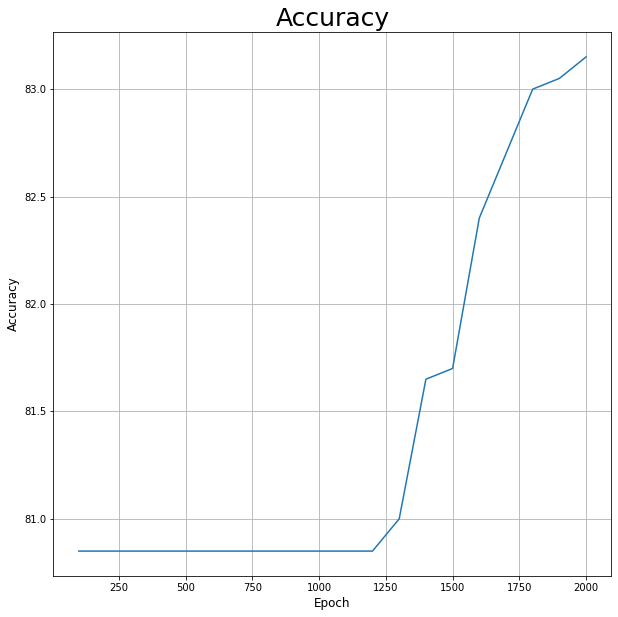

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(historico['Epoch'], historico['Accuracy'], label='Accuracy')
plt.title("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid()
plt.show()

In [ ]:
t_x_test[5]

tensor([ 1.3810, -0.7554,  0.6871, -1.2258,  0.8077,  0.6461,  0.9702,  0.7497,
         0.9972, -0.5787, -0.5738, -0.9124,  0.9124])

In [ ]:
prediccion = model(t_x_test[5])
print(prediccion)

tensor([0.0565], grad_fn=<SigmoidBackward0>)


In [ ]:
t_y_test[5]

tensor([0.])